## Data analysis with Python

Many physical systems can be modeled as an equation, which in Python would be represented by a function $f$. If an appropriate function $f$ can be found for an experiment we can use the equation to determine physical parameters releted to the experiment, and we can use this new model to *predict* new things about the world. Galileo used this method to calculate the trajectory of canonballs by rolling them down inclined ramps.

In experimental physics, we constrain these models by designing an experiment with two quantities. The first quantity, that we can control, is the **independent variable**. The second quantity, that we can measure, is the **dependent variable**.  The relationship between these two quantities can then be used to determine some physical parameters.

A simple example of measuring the path of moving object. We could guess that the model is moving at a constant speed and design an experiment to find that speed using the model:

$$ s = ut $$ 

## Scipy provides functions that can fit model functions to data.

`Scipy` provides a number of functions that, given a suitable model function, can return the *best estimate* of the unknown parameters in the model. 

Consider the experiment where the time of flight of an object moving at constant speed is measured. If the experiment is correctly setup. The unknown variable we are trying to determine is the speed $u$. The remaining variables are time $t$ and height $s$. We can design two different experiments, one where we control *time* (measuring at a fixed interval) and measure *distance*, or one where we control *distance* and measure *time*. 

In Python the model function might be written as:

In [1]:
def distance(time, speed):
    """Calculate the distance travelled at a constant speed for a known time."""
    return speed * time

def model_function(independent_data, parameter1, parameter2):
    """A template for the model function."""
    dependent_data = parameter1 * independent_data + parameter2
    return dependent_data

In [2]:
#control time, measure distance
import numpy
# derr is my estimate of errors measuring distance, my ruler is bad.
derr = 5 # metres
measured_times =numpy.arange(10,100,10) #time in seconds
measured_distances = numpy.array([ 108.2,  220.4,  360.2,  482.8,
        630.6,  793.9,  947.5, 1125.0, 1314.9]) # distance in metres
distance_errors = numpy.ones_like(measured_distances)*derr

For such a simple model, the average speed can be calculated from the data quite easily.

In [21]:
speeds = numpy.diff(measured_distances) / numpy.diff(measured_times)
average_speed = numpy.average(speeds)
print("Average speed is {:.04g} m/s".format(average_speed))
mean_times_error = numpy.std(speeds, ddof=1)/numpy.sqrt(speeds.size)
mean_times_std = numpy.sqrt( numpy.mean( derr**2 * numpy.ones(speeds.size)) )

#error propagation, sum in quadrature
speed_error = numpy.sqrt( numpy.mean( (distance_errors / measured_distances)**2) )* average_speed
print("Standard error in average speed is {:.03g} m/s".format(mean_times_error))
print("Error in average speed is {:.03g} m/s".format(speed_error))

Average speed is 15.08 m/s
Standard error in average speed is 0.928 m/s
Error in average speed is 0.281 m/s


In [4]:
# Copied here to make it easier to find!
def distance(time, speed):
    """Calculate the distance travelled at a constant speed for a known time."""
    return speed * time

* You can also use `scipy.optimize.curve_fit` to perform this calculation.

In [5]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(distance, measured_times, measured_distances)

print("Speed is %4g m/s" % popt[0])

pvar = numpy.diag(pcov)
print("Error in fitted speed is {:.03g} m/s".format(numpy.sqrt(pvar[0])))

Speed is 13.6645 m/s
Error in fitted speed is 0.31 m/s


## What is `popt`, `pvar`?

* `popt` is a one dimensional array of the best estimates for the parameter values, each entry matches the order in the function definition
* `pcov` is the covariance matrix showing the uncertainty and interdependence of each parameter in `popt`. We take the diagonal elements as `pvar` for the variance of each parameter in `popt`.

* The above error didn't consider the errors in the individual data points correctly.
* Give `curve_fit` the error values using the `sigma` keyword, and always use `absolute_sigma=True`

## Exercise 1
Predict the value of distance at after 10 seconds and 100s.

## Calculate predictions using the model function
* `curve_fit` needs a model function to make predictions.
* Any calculations using that model should also use the function to avoid errors
* e.g. when plotting the predictions you should call the model_function, *and not rewrite the equation*

In [6]:
# Always predict with the model function!
d10 = distance(10, popt[0])
d100 = distance(100, popt[0])
print("After 10 seconds, predicted distance = {:.4g}m".format(d10))
print("After 100 seconds, predicted distance = {:.4g}m".format(d100))

#dont_do_this
rewrite10 = popt[0] * 10
print("After 10 seconds, predicted distance = {:.4g}m".format(rewrite10))

#or this
hardcoded10 = 13.64 * 10
print("After 10 seconds, predicted distance = {:.4g}m".format(hardcoded10))

After 10 seconds, predicted distance = 136.6m
After 100 seconds, predicted distance = 1366m
After 10 seconds, predicted distance = 136.6m
After 10 seconds, predicted distance = 136.4m


In [7]:
popt, pcov = curve_fit(distance, measured_times, measured_distances,
                       absolute_sigma=True, sigma = distance_errors)
pvar = numpy.diag(pcov)

print("Average speed is {:.04g} m/s".format(popt[0]))
print("Error in fitted speed is {:.03g} m/s".format(numpy.sqrt(pvar[0])))

Average speed is 13.66 m/s
Error in fitted speed is 0.0296 m/s


* With the correct error estimates, the model is more certain about the speed, but the eastimate of the average speed didn't change.

## The model function needs to follow the `curve_fit` rules
* The function must take and array of **independent data** as its first argument
* The function can take any number of additional parameters that will be found using `curve_fit`
* The function must return a single prediction of the **dependent data** for each value in the independent data.

In [8]:
def good_model_function(xdata, parameter_1, parameter_2, parameter_3):
    # code_that_calculates_a_model
    return prediction

## `curve_fit` works with multiple parameters

Extending the above experiment, what if the object was actually accelerating? The model function is now

$$ s = ut + \frac{1}{2} at^2$$

where $a$ is the acceleration. We can change the model function and run the `curve_fit` code again

In [9]:
def distance_with_acceleration(time, speed, acceleration):
    """Calculate the distance travelled with at a constant speed for a known time
    and constant acceleration."""
    return speed * time + 0.5 * acceleration * time**2

from scipy.optimize import curve_fit
popt2, pcov2 = curve_fit(distance_with_acceleration, measured_times, measured_distances,
                       absolute_sigma=True, sigma = distance_errors)
print("Initial speed is {:.04g} m/s".format(popt2[0]))
print("Error in fitted initial speed is {:.03g} m/s".format(numpy.sqrt(pcov2[0,0])))

print("Acceleration is {:.04g} m/s2".format(popt2[1]))
print("Error in fitted acceleration is {:.03g} m/s2".format(numpy.sqrt(pcov2[1,1])))

Initial speed is 10.26 m/s
Error in fitted initial speed is 0.119 m/s
Acceleration is 0.09589 m/s2
Error in fitted acceleration is 0.00325 m/s2


The data use here is fake, generated with an initial speed of 10.86 m/s and an acceleration of 0.1$m/s^2$. The model with constant speed predicted a higher speed to compensate for the acceleration!

## Exercise 1
How could we have quickly checked whether our model was good?

A **plot** would have quickly showed the linear model is not correct, or printing each value predicted might tell us something too for small amounts of data.



Text(0, 0.5, 'Distance (m)')

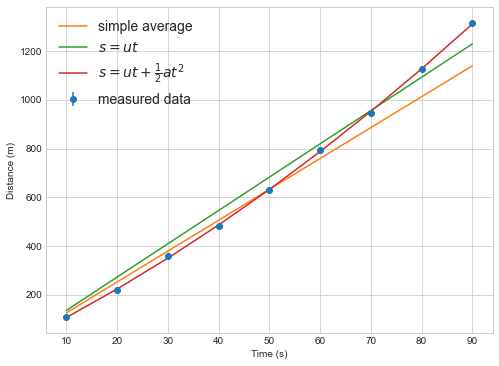

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(8,6))
plt.errorbar(measured_times, measured_distances,yerr=distance_errors, marker='o', linestyle='none', label="measured data")
plt.plot(measured_times, distance(measured_times, numpy.mean(speeds)),label='simple average')
plt.plot(measured_times, distance(measured_times, popt[0]),label='$s=ut$')
plt.plot(measured_times, distance_with_acceleration(measured_times, popt2[0],popt2[1]),label=r'$s=ut+\frac{1}{2}at^2$')
plt.legend(fontsize=14)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")

**Always plot your data and model fits.**

## Plotting residuals

Once you have a model prediction, you can check for problems in the model using a residual plot. Plot the difference between the model prediction and the measured data.


Text(0, 0.5, 'Distance (m)')

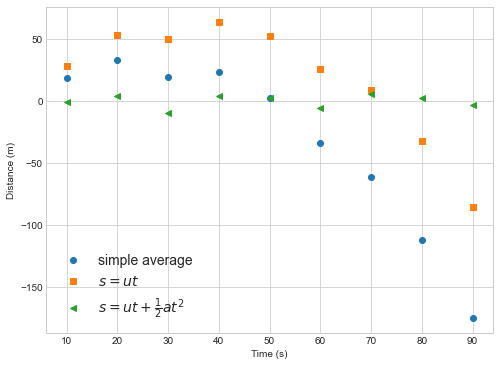

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(8,6))
plt.plot(measured_times, distance(measured_times, numpy.mean(speeds))-measured_distances,label='simple average',marker='o',ls='')
plt.plot(measured_times, distance(measured_times, popt[0])-measured_distances,label='$s=ut$',marker='s',ls='')
plt.plot(measured_times, distance_with_acceleration(measured_times, popt2[0],popt2[1])-measured_distances,label=r'$s=ut+\frac{1}{2}at^2$',marker='<',ls='')
plt.legend(fontsize=14)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")

In this example you can see that the linear model (`simple average` or `s=ut`) deviates from the data in a way that depends on the `independent variable` (time). If the model fit is good we expect to see differences betwee model and data that are random in magnitude and location (as in the quadratic fit).

## `curve_fit` find the *best estimate* of the parameters using by minimizing **chi squared**.
* Curve fit works by finding the combination of parameters that gives the lowest value of a parameter $\chi^2$, defined as 

$$\chi^2 = \sum\frac{(y_i - f(x_i))^2}{\sigma_{y_i}^2}$$

* The lower the value of $\chi^2$, the closer the model is **on average** to each measured data point. 
* This metric penalizes outliers disproportionally because of the square factor
* The metric weights the penalty of each point by the inverse of the standard deviation, penalizing (genuinely) noisier outliers less than less noisy outliers.

## **Reduced chi squared** is easier to understand and compare between data sets.
* The value of $\chi^2$ for a good model depends on the number of data points and model parameters.
* A related variable $$\chi_r^2 = \frac{\chi^2}{\mathrm{dof}}$$ is defined such that a the ideal value is 1.0.  
* To get the metric we need the number of **degrees of freedom** (dof) defined as the number of data points (N) minus the number of unknown parameters (m) $$\mathrm{dof} = N - m$$.

* High values of $\chi_r^2$ are bad and suggest the model does a poor job of fitting the data.
* Low values (<<1) are also bad, suggesting the model fits the data **too well**.
* A low value suggests the model is fitting data better than the average error in the data should allow.

In [12]:
def chi2(y_measure,y_predict,errors):
    """Calculate the chi squared value given a measurement with errors and prediction"""
    return numpy.sum( (y_measure - y_predict)**2 / errors**2 )

def chi2reduced(y_measure, y_predict, errors, number_of_parameters):
    """Calculate the reduced chi squared value given a measurement with errors and prediction,
    and knowing the number of parameters in the model."""
    return chi2(y_measure, y_predict, errors)/(y_measure.size - number_of_parameters)

In [13]:
print("Constant velocity model chi2r=",chi2reduced(measured_distances, 
                                        distance(measured_times,popt[0]),
                                        distance_errors,
                                        1))

print("Constant acceleration model chi2r=",chi2reduced(measured_distances, 
                                        distance_with_acceleration(measured_times,popt2[0],popt2[1]),
                                        distance_errors,
                                        2))

Constant velocity model chi2r= 109.63987561403505
Constant acceleration model chi2r= 1.1810606671759618


**Chi square values should be rounded to a small number of digits, keeping only 1 or 2 significant figures.**

In [14]:
print("Constant velocity model chi2r=",round(chi2reduced(measured_distances, 
                                        distance(measured_times,popt[0]),
                                        distance_errors,
                                        1),-1))

print("Constant acceleration model chi2r=",round(chi2reduced(measured_distances, 
                                        distance_with_acceleration(measured_times,popt2[0],popt2[1]),
                                        distance_errors,
                                        2),1))

Constant velocity model chi2r= 110.0
Constant acceleration model chi2r= 1.2


## Exercise 2
Put a print statement inside the model function `distance_with_acceleration` to print out the parameter values. What is happening to the parameter values?

In [15]:
def distance_with_acceleration_print(time, speed, acceleration):
    """Calculate the distance travelled with at a constant speed for a known time
    and constant acceleration."""
    
    print ("speed=",speed, "acceleration=",acceleration)
    return speed * time + 0.5 * acceleration * time**2

popt2, pcov2 = curve_fit(distance_with_acceleration_print, measured_times, measured_distances,
                       absolute_sigma=True, sigma = distance_errors)


speed= 1.0 acceleration= 1.0
speed= 1.0 acceleration= 1.0
speed= 1.0 acceleration= 1.0
speed= 1.0000000149011612 acceleration= 1.0
speed= 1.0 acceleration= 1.0000000149011612
speed= 10.257717023193093 acceleration= 0.0958943850247661
speed= 10.257717176044988 acceleration= 0.0958943850247661
speed= 10.257717023193093 acceleration= 0.0958943864537038
speed= 10.257717023531002 acceleration= 0.09589438501373611


## Non-linear regression
* Mathematically, `curve_fit` is using *least squared error regression* to find the best parameter estimate. 
* `curve_fit` works with non linear model (e.g. $y=at^{(b-1)}+c$) and the error estimates are usually correct.

## When fitting non-linear functions, use the `p0` keyword to start `curve_fit` with a good estimate
* `p0` is used to provide a first guess of the parameters you are trying to find
* If you have some idea of a parameter value, use `p0` to give `curve_fit` a better chance of finding the global minimum error for non-linear functions
* Don't be too precise so as not to bias the fitting process.

In [16]:
iteration=0

def nonlinear_function(t, a, b, c,verbose=True):
    global iteration
    if verbose:
        print (iteration, "a=",a, "b=",b, "c=",c)
    iteration = iteration+1
    return a*t**(b-1) + c

#generated "good" data
t=numpy.arange(10)
y=numpy.array([-0.173, 2.12, 9.42, 19.69, 37.16, 59.40, 96.59, 119.448, 158.0,201.9])
sigmaNL = numpy.ones(10)*0.5

First, try fitting the non-linear function with no initial guess

In [17]:
iteration=0
poptNL1, pcovNL1 = curve_fit(nonlinear_function, t, y,
                       absolute_sigma=True, sigma = sigmaNL)

0 a= 1.0 b= 1.0 c= 1.0
1 a= 1.0 b= 1.0 c= 1.0
2 a= 1.0 b= 1.0 c= 1.0
3 a= 1.0000000149011612 b= 1.0 c= 1.0
4 a= 1.0 b= 1.0000000149011612 c= 1.0
5 a= 1.0 b= 1.0 c= 1.0000000149011612
6 a= 1.0 b= 1.0 c= 1.0
7 a= 77.19199892187382 b= 1.000001167729559 c= 1.0
8 a= 77.19200007212423 b= 1.000001167729559 c= 1.0
9 a= 77.19199892187382 b= 1.0000011826307376 c= 1.0
10 a= 77.19199892187382 b= 1.000001167729559 c= 1.0000000149011612
11 a= 77.19199892187382 b= 1.000001167729559 c= 1.0
12 a= 78.36447902458006 b= 1.0000087185633115 c= -0.1733935003196454
13 a= 78.3644801923018 b= 1.0000087185633115 c= -0.1733935003196454
14 a= 78.36447902458006 b= 1.0000087334646026 c= -0.1733935003196454
15 a= 78.36447902458006 b= 1.0000087185633115 c= -0.1733934977358809
16 a= 78.36447902458006 b= 1.0000087185633115 c= -0.1733935003196454
17 a= 78.36572988965274 b= 1.0000240495335326 c= -0.17606961644868022
18 a= 78.36573105739312 b= 1.0000240495335326 c= -0.17606961644868022
19 a= 78.36572988965274 b= 1.00002406

/Users/lee/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Try a good guess for the parameters

In [18]:
iteration = 0
poptNL2, pcovNL2 = curve_fit(nonlinear_function, t, y,
                       absolute_sigma=True, sigma = sigmaNL, p0=(2.5,3,0))
#I think it's 2.5*t^2 with no offset

0 a= 2.5 b= 3.0 c= 0.0
1 a= 2.5 b= 3.0 c= 0.0
2 a= 2.5 b= 3.0 c= 0.0
3 a= 2.500000037252903 b= 3.0 c= 0.0
4 a= 2.5 b= 3.0000000447034836 c= 0.0
5 a= 2.5 b= 3.0 c= 1.4901161193880158e-08
6 a= 2.507540116653946 b= 2.9990074809599334 c= -0.973917163330992
7 a= 2.5075401540192055 b= 2.9990074809599334 c= -0.973917163330992
8 a= 2.507540116653946 b= 2.9990075256486275 c= -0.973917163330992
9 a= 2.507540116653946 b= 2.9990074809599334 c= -0.9739171488184953
10 a= 2.5074184226341583 b= 2.9990315172382234 c= -0.9734643979860024
11 a= 2.5074184599976044 b= 2.9990315172382234 c= -0.9734643979860024
12 a= 2.5074184226341583 b= 2.9990315619272754 c= -0.9734643979860024
13 a= 2.5074184226341583 b= 2.9990315172382234 c= -0.9734643834802524
14 a= 2.5074209783416057 b= 2.9990310475838156 c= -0.9734720313746336


Now try an unreasonable guess for the `b` parameter

In [19]:
iteration = 0
poptNL3, pcovNL3 = curve_fit(nonlinear_function, t, y,
                       absolute_sigma=True, sigma = sigmaNL, p0=(3,-2,0.1))
#I think it's 3/t^3 +0.1

0 a= 3.0 b= -2.0 c= 0.1
1 a= 3.0 b= -2.0 c= 0.1
2 a= 3.0 b= -2.0 c= 0.1
3 a= 3.0000000447034836 b= -2.0 c= 0.1
4 a= 3.0 b= -1.9999999701976776 c= 0.1
5 a= 3.0 b= -2.0 c= 0.10000000149011612


<ipython-input-16-e5111c3ba7f6>:8: RuntimeWarning: divide by zero encountered in power
  return a*t**(b-1) + c


It's always important to **check the fit**

6 a= 2.5074218440690506 b= 2.999030898202475 c= -0.973477342338129
7 a= 2.5074209783416057 b= 2.9990310475838156 c= -0.9734720313746336
8 a= 3.0 b= -2.0 c= 0.1


<ipython-input-16-e5111c3ba7f6>:8: RuntimeWarning: divide by zero encountered in power
  return a*t**(b-1) + c
<ipython-input-16-e5111c3ba7f6>:8: RuntimeWarning: divide by zero encountered in power
  return a*t**(b-1) + c


[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'Time (s)')]

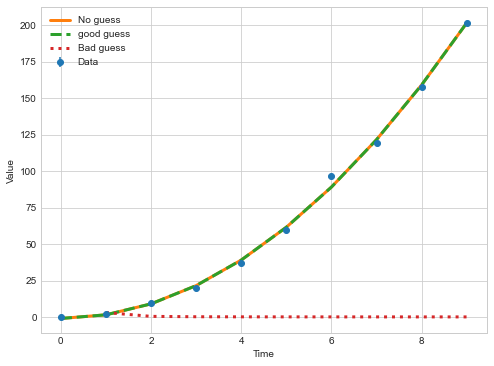

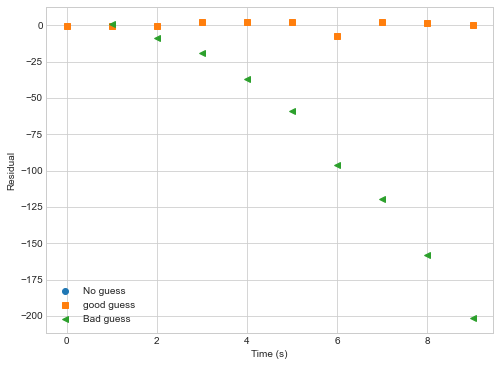

In [20]:
plt.figure(figsize=(8,6))
plt.errorbar(t, 
             y,
             yerr=sigmaNL, marker='o',ls='none',label="Data")

def plot_and_print(popt,ls,label):
    plt.plot(t, nonlinear_function(t,popt[0],popt[1],popt[2]),label=label,ls=ls,lw=3)
plot_and_print(poptNL1,"-","No guess")
plot_and_print(poptNL2,"--","good guess")
plot_and_print(poptNL3,":","Bad guess")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.figure(figsize=(8,6))



def plot_residual(data, popt,marker,label):
    plt.plot(t, nonlinear_function(t,popt[0],popt[1],popt[2],verbose=False)-data,label=label,marker=marker,ls='',lw=3)
plot_residual(y,poptNL1,"o","No guess")
plot_residual(y,poptNL2,"s","good guess")
plot_residual(y,poptNL3,"<","Bad guess")

plt.legend()
plt.setp(plt.gca(),ylabel="Residual",xlabel="Time (s)")



## Keypoints
* `scipy` provides tools and functions to fit models to data.
* Use `curve_fit` to fit linear and non-linear models to experimental data
* Use appropriate errors in the `sigma` keyword to get a better estimate of parameter errors.
* **Check the fit** using a plot if possible
* Check the $\chi_r^2$ value to compare the fit against the errors in the measurements.
* Non linear models can be fitted, but may need an initial esimate of the parameters.